In [1]:
import requests, readline, sys, json
import numpy
import networkx as nx
import matplotlib as mpl
%matplotlib inline
%config InlineBacked.figure_format = 'svg'
import matplotlib.pyplot as plt
import matplotlib.cm as cmap
import seaborn
from graphviz import Digraph
from query import *
from contexts import *
from myconcepts import *
from repair import *



In [2]:
eventCtxt = makeContext(getQuery(proc_eventQ),'pid','type')
eventCtxt

{'709': {'EVENT_ACCEPT', 'EVENT_CLONE', 'EVENT_CREATE_OBJECT'},
 '3138': {'EVENT_MMAP',
  'EVENT_OPEN',
  'EVENT_OTHER',
  'EVENT_READ',
  'EVENT_WRITE'},
 '3244': {'EVENT_CLONE',
  'EVENT_CREATE_OBJECT',
  'EVENT_OPEN',
  'EVENT_OTHER',
  'EVENT_READ',
  'EVENT_WRITE'},
 '3366': {'EVENT_CONNECT',
  'EVENT_MMAP',
  'EVENT_OPEN',
  'EVENT_OTHER',
  'EVENT_SENDTO'},
 '3373': {'EVENT_CLONE',
  'EVENT_CREATE_OBJECT',
  'EVENT_OPEN',
  'EVENT_OTHER',
  'EVENT_READ'},
 '1804': {'EVENT_MMAP', 'EVENT_OPEN', 'EVENT_READ'},
 '1418': {'EVENT_CLONE', 'EVENT_OPEN', 'EVENT_READ'},
 '3474': {'EVENT_CLONE'},
 '761': {'EVENT_ACCEPT'},
 '679': {'EVENT_OPEN', 'EVENT_READ'},
 '772': {'EVENT_ACCEPT',
  'EVENT_MMAP',
  'EVENT_OPEN',
  'EVENT_OTHER',
  'EVENT_WRITE'},
 '1883': {'EVENT_CLONE'},
 '1023': {'EVENT_CLONE',
  'EVENT_CREATE_OBJECT',
  'EVENT_OPEN',
  'EVENT_READ',
  'EVENT_WRITE'},
 '2826': {'EVENT_CLONE'},
 '3475': {'EVENT_CLONE',
  'EVENT_CREATE_OBJECT',
  'EVENT_EXECUTE',
  'EVENT_MMAP',
  'EVEN

In [3]:
(reCtx, dictionary) = rePair(eventCtxt,{},thresh=5,showCost=True)
(reCtx,dictionary)

36807.6028855
31103.4705858
26256.4399606
21302.7835797
16176.9050681
15242.3372725
14330.6442768
13438.5250896
12580.2064181
11746.3988556
11454.5239927
11345.3576161
11309.3797567
11320.1966041
11340.1553545
11380.0
11325.0
11375.1087392
11421.3540786
11375.566913
11422.9132787
11466.8936532
11507.6824847
11555.9363846
11601.4578704
11644.3786716
11684.8209221
11728.2903945
11774.9945177
11747.8631939
11797.8317279


({'709': {'EVENT_ACCEPT', 'new_att15'},
  '3138': {'EVENT_WRITE', 'new_att17'},
  '3244': {'EVENT_OTHER', 'new_att15', 'new_att20'},
  '3366': {'new_att16', 'new_att19'},
  '3373': {'EVENT_OTHER', 'new_att1', 'new_att15'},
  '1804': {'new_att2'},
  '1418': {'EVENT_CLONE', 'new_att1'},
  '3474': {'EVENT_CLONE'},
  '761': {'EVENT_ACCEPT'},
  '679': {'new_att1'},
  '772': {'EVENT_ACCEPT', 'EVENT_OTHER', 'EVENT_WRITE', 'new_att16'},
  '1883': {'EVENT_CLONE'},
  '1023': {'new_att15', 'new_att20'},
  '2826': {'EVENT_CLONE'},
  '3475': {'EVENT_CLONE', 'new_att10'},
  '735': {'EVENT_ACCEPT', 'EVENT_WRITE', 'new_att2', 'new_att5'},
  '3476': {'EVENT_CREATE_OBJECT'},
  '3478': {'new_att4'},
  '3477': {'new_att12'},
  '3479': {'new_att4'},
  '3480': {'new_att4'},
  '2772': {'EVENT_OTHER', 'new_att16'},
  '1024': {'EVENT_OPEN'},
  '1898': {'new_att17'},
  '5037': {'EVENT_OPEN'},
  '3481': {'new_att11'},
  '5039': {'new_att4'},
  '5040': {'EVENT_CREATE_OBJECT'},
  '5042': {'new_att4'},
  '5043': {'

In [4]:
def expandDict(dictionary):
    expansions = {}
    def expand(att):
        if not(att in dictionary.keys()):
            return {att}
        elif att in expansions.keys():
            return expansions[att]
        else:
            exp = frozenset()
            for att2 in dictionary[att]:
                exp = exp | expand(att2)
            return exp
    for att in dictionary.keys():
        expansions[att] = expand(att)
    return expansions
exps = expandDict(dictionary)
exps

{'new_att1': frozenset({'EVENT_OPEN', 'EVENT_READ'}),
 'new_att10': frozenset({'EVENT_CREATE_OBJECT',
            'EVENT_EXECUTE',
            'EVENT_MMAP',
            'EVENT_MPROTECT',
            'EVENT_OPEN',
            'EVENT_READ'}),
 'new_att11': frozenset({'EVENT_CLONE',
            'EVENT_EXECUTE',
            'EVENT_MMAP',
            'EVENT_MPROTECT',
            'EVENT_OPEN',
            'EVENT_READ'}),
 'new_att12': frozenset({'EVENT_CONNECT',
            'EVENT_EXECUTE',
            'EVENT_MMAP',
            'EVENT_MPROTECT',
            'EVENT_OPEN',
            'EVENT_READ'}),
 'new_att13': frozenset({'EVENT_CREATE_OBJECT', 'EVENT_READ'}),
 'new_att14': frozenset({'EVENT_CREATE_OBJECT',
            'EVENT_EXECUTE',
            'EVENT_MMAP',
            'EVENT_MPROTECT',
            'EVENT_OPEN',
            'EVENT_READ',
            'EVENT_WRITE'}),
 'new_att15': frozenset({'EVENT_CLONE', 'EVENT_CREATE_OBJECT'}),
 'new_att16': frozenset({'EVENT_MMAP', 'EVENT_OPEN'}),
 

In [5]:
concepts={getConcept(eventCtxt,exps[att]) for att in exps.keys()}
concepts

{frozenset({'EVENT_OPEN', 'EVENT_READ'}),
 frozenset({'EVENT_EXECUTE',
            'EVENT_MMAP',
            'EVENT_MPROTECT',
            'EVENT_OPEN',
            'EVENT_READ'}),
 frozenset({'EVENT_OPEN', 'EVENT_READ', 'EVENT_WRITE'}),
 frozenset({'EVENT_MMAP', 'EVENT_OPEN', 'EVENT_READ'}),
 frozenset({'EVENT_CREATE_OBJECT', 'EVENT_OPEN', 'EVENT_READ'}),
 frozenset({'EVENT_MMAP', 'EVENT_OPEN'}),
 frozenset({'EVENT_CREATE_OBJECT', 'EVENT_MMAP', 'EVENT_OPEN', 'EVENT_READ'}),
 frozenset({'EVENT_CREATE_OBJECT',
            'EVENT_EXECUTE',
            'EVENT_MMAP',
            'EVENT_MPROTECT',
            'EVENT_OPEN',
            'EVENT_READ'}),
 frozenset({'EVENT_CONNECT', 'EVENT_OTHER'}),
 frozenset({'EVENT_CONNECT',
            'EVENT_OPEN',
            'EVENT_OTHER',
            'EVENT_READ',
            'EVENT_RECVFROM',
            'EVENT_RECVMSG',
            'EVENT_SENDTO'}),
 frozenset({'EVENT_MMAP', 'EVENT_MPROTECT', 'EVENT_OPEN', 'EVENT_READ'}),
 frozenset({'EVENT_CONNECT',


In [6]:
getSupports(eventCtxt,concepts)

{frozenset({'EVENT_OPEN', 'EVENT_READ'}): 1548,
 frozenset({'EVENT_EXECUTE',
            'EVENT_MMAP',
            'EVENT_MPROTECT',
            'EVENT_OPEN',
            'EVENT_READ'}): 1248,
 frozenset({'EVENT_OPEN', 'EVENT_READ', 'EVENT_WRITE'}): 50,
 frozenset({'EVENT_MMAP', 'EVENT_OPEN', 'EVENT_READ'}): 1280,
 frozenset({'EVENT_CREATE_OBJECT', 'EVENT_OPEN', 'EVENT_READ'}): 120,
 frozenset({'EVENT_MMAP', 'EVENT_OPEN'}): 1293,
 frozenset({'EVENT_CREATE_OBJECT',
            'EVENT_MMAP',
            'EVENT_OPEN',
            'EVENT_READ'}): 105,
 frozenset({'EVENT_CREATE_OBJECT',
            'EVENT_EXECUTE',
            'EVENT_MMAP',
            'EVENT_MPROTECT',
            'EVENT_OPEN',
            'EVENT_READ'}): 92,
 frozenset({'EVENT_CONNECT', 'EVENT_OTHER'}): 267,
 frozenset({'EVENT_CONNECT',
            'EVENT_OPEN',
            'EVENT_OTHER',
            'EVENT_READ',
            'EVENT_RECVFROM',
            'EVENT_RECVMSG',
            'EVENT_SENDTO'}): 20,
 frozenset({'EVE

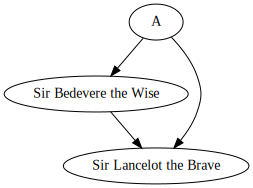

In [8]:
dot = Digraph()

dot.node('A')

dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edge('A','B')
dot.edge('A','L')
dot.edge('B', 'L')

dot